# Conformational sampling of Alanine Dipeptide with weighted ensemble Hamiltonian annealing part 2
Authors: Baily Ford<br>
Email:&nbsp;&nbsp; bwf15@pitt.edu

## Setup

Welcome! This notebook is made with the assumption that you're working on `jupyter.crc.pitt.edu` (or `hub.crc.pitt.edu`) and have setup your virtual environments using https://github.com/Bailyford/drug-design2025_weha. If not, follow the steps in "[Setting up the virtual environment](#Setting-up-the-virtual-environment)".

To start, make sure it says `drug-design2025_weha` on the top right hand corner! If it doesn't, click on `Python 3 (ipykernel)` (Or whatever it currently is) and select `drug-design2025_weha` from the drop down menu as your preferred kernel. Click Select.

![image](./img/Notebook-kernel.png)

### Setting up the virtual environment

Part 1: Visualizing the results

Follow the instructions in venv_instructions.pdf. Here are the condensed steps:

Start a terminal (Should be an option in the "Launcher" tab) run python -m pip install nglview Reset the Jupyter Server. run cd ~ run git clone https://github.com/Bailyford/drug-design2025_weha run cd drug-design2025_weha run bash run_bash.sh then wait. It might take a short while. run bash activate_env.sh

## Learning Objectives

- clustering conformations with Kmeans NANI
- use <code>WEDAP</code> to generate Ramanchandra plots  
- Visualize the results of clustering with <code>matplotlib</code>
- calculate state populations using structure weights 

System Requirements AmberTools24 is necessary to run this simulation. Note that it is already installed as a module on H2P numpy, matplotlib, ipympyl, mdtraj, and nglview are used in this jupyter notebook. nglview, matplotlib, ipympl, and numpy are optional for visualization purposes. These are already installed as part of the virtual environment.

## TABLE OF CONTENTS

[Introduction](#Introduction)

Day 2:

[4. Visualizing the Results](#4.-Visualizing-the-results)

[5. Analyze the MD Results](#5.-Analyze-the-MD-results)

## Introduction

This tutorial is designed to provide an introduction to conformational sampling of biomolecules with the weighted ensemble Hamiltonian Annealing (WEHA) method of the WESTPA software package. It is designed for alanine dipeptide in AMBER 24. This notebook is designed with the assumption that you are working within a virtual environment on the H2P Cluster at Pitt.

This is the second part of the tutorial. This will focus on analyzing the simulation with WEDAP, a python package designed for plotting the results of weighted ensemble simulations and cluster data with k-means NANI. K-means NANI improves upon the Kmeans clustering algorithm by deterministically calculating medoids that optimize cluster diversity. The yeilds faster, deterministic clustering that better reflects grouped data.

### Preparing supplemental data

Only run the following code if you wish to use the supplemental data. This is if you do not have results from part 1. **If you have results you want to use, DO NOT RUN THIS BLOCK.** This will replace your data.

In [ ]:
!rm -r traj_segs
!mv sample_files/west.h5 .
!mv sample_files/lambda.dat common_files/lambda.dat
!mv sample_files/traj_segs .

## 4. Visualizing the Results

While not required for analysis, it is always recommend to view the file lambda.dat located in the common_files directory. This files tracks the iteration, lambda value, and effective sample size for each iteration and updates as the simulation progresses. Print this file and make sure nothing looks off about the simulation. This could include odd lambda jumps, inconsistent ESS values, or lambda values that do not converge to 1. Close to 1 is fine.)

In [5]:
!cat common_files/lambda.dat

iter lambda ESS
0 0.2 99.0
1 0.2087916374206543 99.00000684362936
2 0.2197615480206195 99.00000684362936
3 0.2315946788973658 99.00000684362936
4 0.2418561951931805 99.00000684362936
5 0.2540407473234559 99.00000684362936
6 0.2688098122888865 99.00000684362936
7 0.2804969374422484 99.00001024410182
8 0.2924397539894683 99.00001024410182
9 0.3064721837760665 99.00001024410182
10 0.3211044939379204 99.00001024410182
11 0.3345197205018345 99.00001024410182
12 0.3484089088360587 99.00001024410182
13 0.3645058017894648 99.00001024410182
14 0.3791876234458824 99.00001024410182
15 0.3940118859632816 99.00001024410182
16 0.41048463920718 99.00001024410182
17 0.4270050524885225 99.00001024410182
18 0.4423885921781646 99.00001024410182
19 0.4597801806630329 99.00001024410182
20 0.4748065796657677 99.00001024410182
21 0.490963183246654 99.00001024410182
22 0.5082711224210267 99.00001024410182
23 0.5259648102562369 99.00001024410182
24 0.5438778374077327 99.00001024410182
25 0.5596752240709616 99.

### Analysis with WEDAP

WEDAP is a useful tool for plotting the results of weighted ensemble or conventional md simulations. To use WEDAP, we must suply it with our west.h5 file that contains all of our system information. Here, we would like to view the average probability distribution of both our dihedral angles. The resulting plot is similar to a Ramachandran plot. To generate this plot, run the block below.


verage 2D: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 70.67it/s]

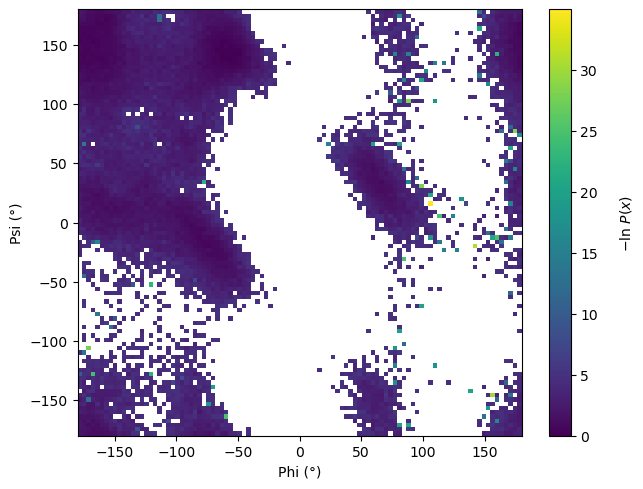

In [53]:
import wedap
import matplotlib.pyplot as plt
import numpy as np
wedap.H5_Plot(h5='west.h5',data_type = "average",first_iter = 2,last_iter=45,plot_mode = 'hist', Yname='psi').plot()
plt.xlabel("Phi (°)")
plt.ylabel("Psi (°)")
plt.show()

While this gives a general overview, all states are dominated by the highest weights to ever visit that state. To make the plot more interperable, we can impose weight thresholds that restrict which weights we see. In the script below, we add a maximum weight of 10 KT. This should make it easier to differentiate unique states.


verage 2D: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:01<00:00, 44.18it/s]

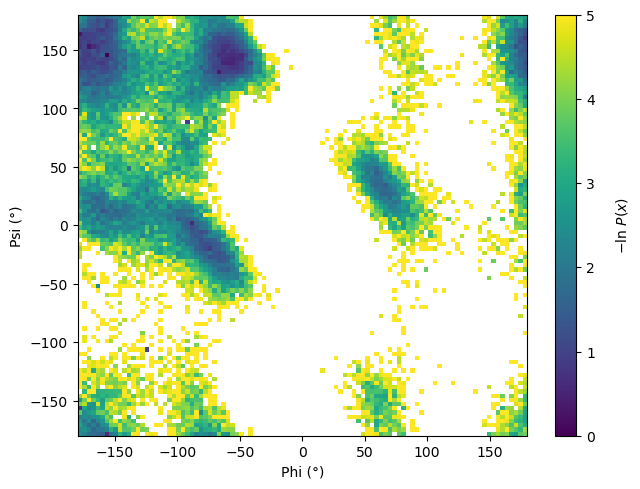

In [61]:
import wedap
import matplotlib.pyplot as plt
import numpy as np
wedap.H5_Plot(h5='west.h5',data_type = "average",first_iter = 1,last_iter=45,plot_mode = 'hist', Yname='psi', p_max=5).plot()
plt.xlabel("Phi (°)")
plt.ylabel("Psi (°)")
plt.savefig("Ramanchandran.pdf")
plt.show()

Additionally, WEDAP is capable of generating GIFs that show how the probability distribution changes over the course of the simulation. This can be useful in finding when certain states are found or die off, and can help visualize transition pathways. Try making a GIF of your simulation data with the code below.


00%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:09<00:00,  4.62it/s]

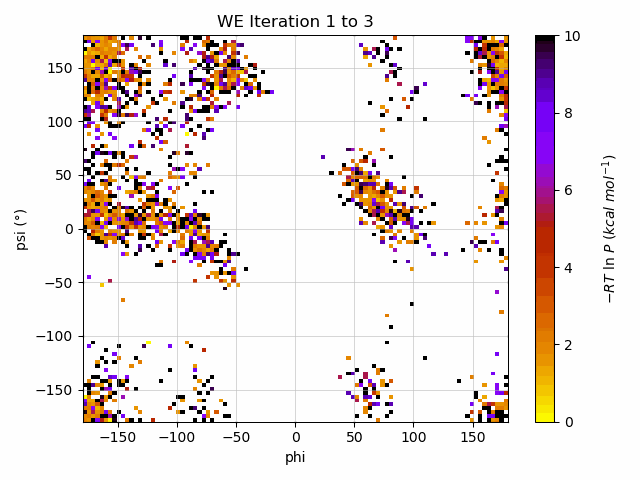

In [60]:
from IPython.display import display, Image
import wedap
plot_options = {"h5" : "west.h5",
                "Xname" : "pcoord",
                "Yname" : "psi",
                "data_type" : "average",
                "p_max" : 10,
                "p_units" : "kcal",
                "first_iter" : 1,
                "last_iter" : 45,
                "plot_mode" : "hist",
                "ylabel" : "psi (°)",
                "xlabel" : "phi",
                "xlim" : (-180, 180),
                "ylim" : (-180, 180),
                "grid" : True,
                "cmap" : "gnuplot_r",
                }
wedap.make_gif(**plot_options, avg_plus=2, gif_out="example.gif")

display(Image(filename="example.gif"))

## 5. Analyze the MD Results

### Exploring the H5 file

WESTPA saves all relevant simulation data in a h5py (.h5) file specified in the west.cfg file. Generally, this files is named west.h5 can in practice have any name. The h5 file has various keys that store a wide variety of data, but for WEHA, the only key we truly care about is the 'iterations' key. This key contains information on our auxillary data, pcoord information, and weigths (seg_index).

In [7]:
import h5py
import numpy as np
f=h5py.File('west.h5')
f.keys()

<KeysViewHDF5 ['bin_topologies', 'ibstates', 'iterations', 'summary', 'tstates']>

In [9]:
import h5py
import numpy as np
f=h5py.File('west.h5')
f['iterations']['iter_00000001'].keys()

<KeysViewHDF5 ['auxdata', 'ibstates', 'pcoord', 'seg_index', 'wtgraph']>

For our analysis, we need our phi and psi angles as well as the weight of each trajectory. This can be obtained by looping over all iterations and appending the values to a list that we can use later. While we aren't going to use the weights yet, we will be saving them while we are here. The dihedral angles will be saved as dihedral_angles.npy and the weight in weight.dat.

In [11]:
import h5py
import numpy as np
f=h5py.File('west.h5')
phi = []
psi = []
weight = []
normalized_weight = []
for i in f['iterations']:
    PHI = f['iterations'][i]['pcoord'][:, -1]
    PSI = f['iterations'][i]['auxdata']['psi'][:, -1]
    prob = f['iterations'][i]['seg_index']['weight'][:]
    phi.extend(PHI)
    psi.extend(PSI)
    weight.extend(prob)
for x in weight:
    norm_weight = x/sum(weight)
    normalized_weight.append(norm_weight)
phi = np.array(phi)
psi = np.array(psi)
normalized_weight = np.array(normalized_weight)
combined = np.column_stack((phi, psi)) 
np.save('dihedral_angles', combined)
np.savetxt('weight.dat', normalized_weight)
print(combined)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
[[ -85.12338     10.610764 ]
 [ 178.9004    -147.15695  ]
 [-120.21628      3.3630524]
 ...
 [ -80.50939    131.55753  ]
 [-163.62689     51.04593  ]
 [ -69.32379    140.51791  ]]


Now that we have our data, we need to determine how many conformations we have. We can do this by clustering all states with Kmeans NANI. First we need to determine the optimal number to cluster on. We can do this by clustering over a range of clusters and calculating a DBI score. The DBI score is a metric that measures how unique clusters are. The ideal cluster number will be the value that minimized the DBI score.

In [8]:
import os

import numpy as np

from mdance.cluster.nani import KmeansNANI, compute_scores
from mdance import data
from mdance.tools.bts import extended_comparison


# System info
input_traj_numpy = 'dihedral_angles.npy'
N_atoms = 1
sieve = 1

# NANI parameters
output_dir = 'outputs'                        
init_types = ['comp_sim']                                           # Must be a list
metric = 'MSD'
start_n_clusters = 2                                               # At least 2 clusters
end_n_clusters = 30                                            # Maximum number of clusters
percentage = 100

if __name__ == '__main__':
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    traj_numpy = np.load(input_traj_numpy, allow_pickle=True)[::sieve]
    for init_type in init_types:
        if init_type in ['k-means++', 'random', 'vanilla_kmeans++']:
            percentage = ''
        
        # `comp_sim` and `div_select` are ran only once to get the initiators
        elif init_type in ['comp_sim', 'div_select']:
            percentage = 100
            mod = KmeansNANI(data=traj_numpy, n_clusters=end_n_clusters, metric=metric, 
                             N_atoms=N_atoms, init_type=init_type, percentage=percentage)
            initiators = mod.initiate_kmeans()
        
        all_scores = []
        for i in range(start_n_clusters, end_n_clusters+1):
            total = 0

            # Run k-means clustering
            if init_type in ['comp_sim', 'div_select']:
                mod = KmeansNANI(data=traj_numpy, n_clusters=i, metric=metric, 
                                 N_atoms=N_atoms, init_type=init_type, percentage=percentage)
                labels, centers, n_iter = mod.kmeans_clustering(initiators)
            elif init_type in ['k-means++', 'random']:
                mod = KmeansNANI(data=traj_numpy, n_clusters=i, metric=metric, 
                                 N_atoms=N_atoms, init_type=init_type)
                labels, centers, n_iter = mod.kmeans_clustering(initiators=init_type)
            elif init_type == 'vanilla_kmeans++':
                mod = KmeansNANI(data=traj_numpy, n_clusters=i, metric=metric, 
                                 N_atoms=N_atoms, init_type=init_type)
                initiators = mod.initiate_kmeans()
                labels, centers, n_iter = mod.kmeans_clustering(initiators=initiators)
            
            
            # Compute scores
            ch_score, db_score = compute_scores(data=traj_numpy, labels=labels)
            
            # Calculate MSD for each cluster
            dict = {}
            for j in range(i):
                dict[j] = np.where(labels == j)[0]
                dict[j] = traj_numpy[dict[j]]
            for key in dict:
                msd = extended_comparison(np.array(dict[key]), traj_numpy_type='full', 
                                          metric=metric, N_atoms=N_atoms)
                total += msd
            all_scores.append((i, n_iter, ch_score, db_score, total/i))
        
        all_scores = np.array(all_scores)
        header = f'init_type: {init_type}, percentage: {percentage}, metric: {metric}, sieve: {sieve}\n'
        header += 'Number of clusters, Number of iterations, Calinski-Harabasz score, Davies-Bouldin score, Average MSD'
        np.savetxt(f'{output_dir}/{percentage}{init_type}_summary.csv', all_scores, 
                   delimiter=',', header=header, fmt='%s')

The code below will plot the DBI scores and indicates the best values.

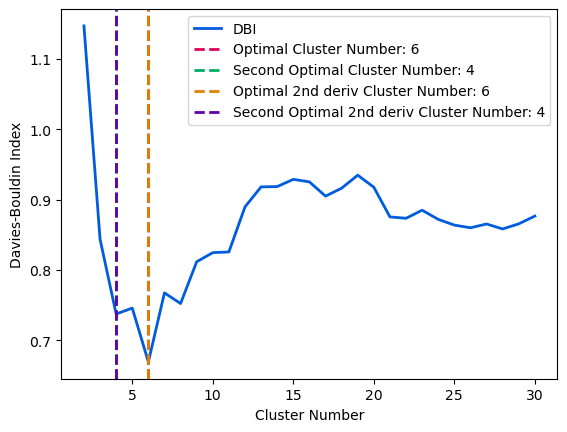

In [62]:
"""
Cluster Analysis
===============================================

MDANCE provides a pipeline to screen the optimal number of clusters for a given dataset.

The pwd of this script is ``$PATH/MDANCE/examples``.
"""
###############################################################################
# To begin with, let's first import the modules we will use:

import matplotlib.pyplot as plt
import numpy as np

###############################################################################
# ``scores_csvs`` is the list of screening csv that were outputted from `screen_nani.py`.
# The output of this notebook will also be the same directory as the input csvs.

scores_csvs = ['outputs/100comp_sim_summary.csv']

###############################################################################
# The function below will plot the Davies-Bouldin index and the optimal number of clusters.
#   - The optimal number of clusters is determined by the minimum Davies-Bouldin index or the minimum of the second derivative of the Davies-Bouldin index.
#   - Potential Errors
#       - Please remember to remove the row with ``None,None`` in the screening csv if there is an error.

def plot_scores(scores_csv):
    """Plot the Davies-Bouldin index and the optimal number of clusters.
    
    Parameters
    ----------
    scores_csv : str
        The path to the csv file that contains the screening
    
    Returns
    -------
    file
        A png file that contains the plot of the Davies-Bouldin index and the optimal number of clusters
    """
    base_name = scores_csv.split('\\')[-1].split('.csv')[0]
    n_clus, db = np.loadtxt(scores_csv, unpack=True, delimiter=',', usecols=(0, 3))

    # Plot the Davies-Bouldin index and the optimal number of clusters
    all_indices = np.argsort(db)
    min_db_index = all_indices[0]
    min_db = n_clus[min_db_index]
    all_indices = np.delete(all_indices, 0)
    second_min_index = all_indices[0]
    second_min_db = n_clus[second_min_index]
    
    fig, ax = plt.subplots()
    ax.plot(n_clus, db, color='#005cde', label='DBI', linewidth=2)
    ax.set_xlabel('Cluster Number')
    ax.set_ylabel('Davies-Bouldin Index')
    ax.axvline(x=min_db, color='#de005c', linestyle='--', label=f'Optimal Cluster Number: {int(min_db)}', linewidth=2)
    ax.axvline(x=second_min_db, color='#00ab64', linestyle='--', label=f'Second Optimal Cluster Number: {int(second_min_db)}', linewidth=2)

    # Calculate the second derivative (before + after - 2*current)
    arr = db
    x = n_clus[1:-1]
    result = []
    for start_index, n_clusters in zip(range(1, len(arr) - 1), x):
        temp = arr[start_index + 1] + arr[start_index - 1] - (2 * arr[start_index])
        if arr[start_index] <= arr[start_index - 1] and arr[start_index] <= arr[start_index + 1]:
            result.append((n_clusters, temp))
    result = np.array(result)
    if len(result) == 0:
        print('No maxima found')
    elif len(result) >= 1:
        sorted_indices = np.argsort(result[:, 1])[::-1]
        sorted_result = result[sorted_indices]
        min_x = sorted_result[0][0]
        ax.axvline(x=min_x, color='#de8200', linestyle='--', label=f'Optimal 2nd deriv Cluster Number: {int(min_x)}', linewidth=2)
        if len(sorted_result) >= 2:
            sec_min_x = sorted_result[1][0]
            ax.axvline(x=sec_min_x, color='#6400ab', linestyle='--', label=f'Second Optimal 2nd deriv Cluster Number: {int(sec_min_x)}', linewidth=2)
    
    ax.legend(fontsize=10)
    plt.show()
    
if __name__ == '__main__':
    for scores_csv in scores_csvs:
        plot_scores(scores_csv)

Now that we have the optimal cluster number, we need to assign each trajectory to a cluster. We can initiate Kmeans NANI with the code below. Be sure to set n_clusters equal to value you get if you use your own data.

In [ ]:
import os

import numpy as np

from mdance.cluster.nani import KmeansNANI
from mdance import data
from mdance.tools.bts import extended_comparison, calculate_medoid


# System info - EDIT THESE
input_traj_numpy = 'dihedral_angles.npy'
N_atoms = 1
sieve = 1

# K-means params - EDIT THESE
n_clusters = 6
init_type = 'comp_sim'                                              # Default
metric = 'MSD'                                                      # Default
n_structures = 1                                                   # Default
output_dir = 'outputs'                                              # Default


if __name__ == '__main__':
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    traj_numpy = np.load(input_traj_numpy)[::sieve]
    mod = KmeansNANI(data=traj_numpy, n_clusters=n_clusters, N_atoms=N_atoms, init_type=init_type, 
                     metric=metric, percentage=10)
    labels, centers, n_iter = mod.execute_kmeans_all()
    sort_labels_by_size = np.argsort(np.bincount(labels))[::-1]
    labels = np.array([np.where(sort_labels_by_size == i)[0][0] for i in labels])
    best_frames = []
    cluster_msd = []

    # Save best frames indices for each cluster
    for i, label in enumerate(np.unique(labels)):
        cluster = np.where(labels == label)[0]
        if len(cluster) > 1:
            medoid_index = calculate_medoid(traj_numpy[cluster], metric=metric, N_atoms=N_atoms)
            medoid = traj_numpy[cluster][medoid_index]
            msd_to_medoid = []
            for j, frame in enumerate(traj_numpy[cluster]):
                msd_to_medoid.append((j, extended_comparison(
                    np.array([frame, medoid]), data_type='full', metric=metric, N_atoms=N_atoms)))
            msd_to_medoid = np.array(msd_to_medoid)
            sorted_indices = np.argsort(msd_to_medoid[:, 1])
            best_n_structures = traj_numpy[cluster][sorted_indices[:n_structures]]
            best_frames.append(best_n_structures)
    
    best_frames_indices = []
    for i, frame in enumerate(traj_numpy):
        i = i * sieve
        for j, cluster in enumerate(best_frames):
            if np.any(np.all(cluster == frame, axis=1)):
                best_frames_indices.append((i, j))
    best_frames_indices = np.array(best_frames_indices)
    best_frames_indices = best_frames_indices[best_frames_indices[:, 1].argsort()]
    np.savetxt(f'{output_dir}/best_frames_indices_{n_clusters}.csv', best_frames_indices, delimiter=',', fmt='%s', 
               header=f'Numer of clusters,{n_clusters}\nFrame Index,Cluster Index')
    
    # Save cluster labels
    with open(f'{output_dir}/labels_{n_clusters}.csv', 'w') as f:
        f.write(f'# init_type: {init_type}, Number of clusters: {n_clusters}\n')
        f.write('# Frame Index, Cluster Index\n')
        for i, row in enumerate(labels):
            f.write(f'{i * sieve},{row}\n')
    
    # Calculate population of each cluster
    with open(f'{output_dir}/summary_{n_clusters}.csv', 'w') as f:
        f.write(f'# Number of clusters, {n_clusters}\n')
        f.write('# Cluster Index, Fraction out of total pixels\n')
        for i, row in enumerate(np.bincount(labels)):
            f.write(f'{i},{row/len(labels)}\n')

NANI will output the reulting files in a new directory named outputs. There are 3 files: labels.csv which contain each frame and its corresponding cluster, best_frames_indices which indicates the frame used as the medoid of each clsuster, and summary.csv that gives an approximate population of each cluster. Using the labels file, we can plot our dihedral angles to see how well the clustering performed. To do so, run the block below.

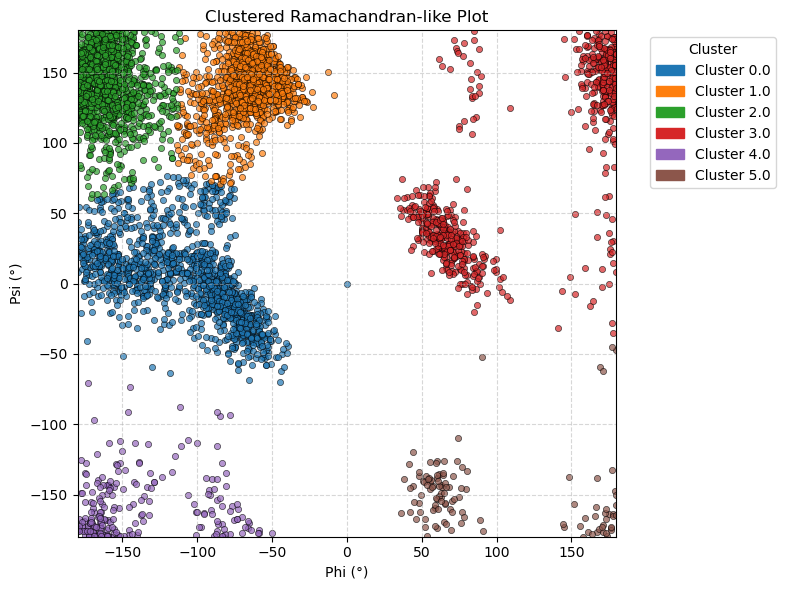

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

# Load your data
file_path = "outputs/combined_data.txt"  # Change this to your actual file path
df = pd.read_csv(file_path, delimiter=',', header=0, names=["index", "cluster_label", "phi", "psi"])

# Extract relevant columns
phi = df["phi"]
psi = df["psi"]
clusters = df["cluster_label"]

# Generate distinct colors using Matplotlib's 'tab10' colormap
unique_clusters = np.unique(clusters)
palette = plt.get_cmap("tab10")  # 'tab10' gives 10 distinct colors

# Assign colors
cluster_colors = {cluster: palette(i % 10) for i, cluster in enumerate(unique_clusters)}

# Create the scatter plot
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    mask = clusters == cluster
    plt.scatter(phi[mask], psi[mask], s=20, color=cluster_colors[cluster], edgecolor="black", linewidth=0.5, alpha=0.7)

# Formatting
plt.xlabel("Phi (°)")
plt.ylabel("Psi (°)")
plt.title("Clustered Ramachandran Plot")
plt.xlim(-180, 180)
plt.ylim(-180, 180)
import matplotlib.patches as mpatches

# Create legend patches manually
legend_patches = [mpatches.Patch(color=cluster_colors[cluster], label=f"Cluster {cluster}") for cluster in unique_clusters]

plt.legend(handles=legend_patches, title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

You may notice that the clusters that cross the periodic boundary get classified as their own cluster. This is obviously not ideal. To combat this, we can remove the periodic boundaries by taking the sine and cosine values of each angle. This basically converst us from a 2d plane to a sphere. We can cluster the sphericle data, then replot it. Unfortunately, this does mean that we should recluster our data and repeat the steps from before.

In [48]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
file_path = np.load("dihedral_angles.npy")
df = pd.DataFrame(file_path, columns=['phi', 'psi'])

# Extract phi/psi angles
phi_rad = np.deg2rad(df["phi"])
psi_rad = np.deg2rad(df["psi"])

# Convert to circular space
df["phi_sin"], df["phi_cos"] = np.sin(phi_rad), np.cos(phi_rad)
df["psi_sin"], df["psi_cos"] = np.sin(psi_rad), np.cos(psi_rad)
trig_columns = ["phi_sin", "phi_cos", "psi_sin", "psi_cos"]
trig_array = df[trig_columns].to_numpy()

# Save to .npy file
np.save("trig_data.npy", trig_array)


In [9]:
import os

import numpy as np

from mdance.cluster.nani import KmeansNANI, compute_scores
from mdance import data
from mdance.tools.bts import extended_comparison


# System info
input_traj_numpy = 'trig_data.npy'
N_atoms = 1
sieve = 1

# NANI parameters
output_dir = 'outputs'                        
init_types = ['comp_sim']                                           # Must be a list
metric = 'MSD'
start_n_clusters = 2                                               # At least 2 clusters
end_n_clusters = 30                                            # Maximum number of clusters
percentage = 100

if __name__ == '__main__':
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    traj_numpy = np.load(input_traj_numpy, allow_pickle=True)[::sieve]
    for init_type in init_types:
        if init_type in ['k-means++', 'random', 'vanilla_kmeans++']:
            percentage = ''
        
        # `comp_sim` and `div_select` are ran only once to get the initiators
        elif init_type in ['comp_sim', 'div_select']:
            percentage = 100
            mod = KmeansNANI(data=traj_numpy, n_clusters=end_n_clusters, metric=metric, 
                             N_atoms=N_atoms, init_type=init_type, percentage=percentage)
            initiators = mod.initiate_kmeans()
        
        all_scores = []
        for i in range(start_n_clusters, end_n_clusters+1):
            total = 0

            # Run k-means clustering
            if init_type in ['comp_sim', 'div_select']:
                mod = KmeansNANI(data=traj_numpy, n_clusters=i, metric=metric, 
                                 N_atoms=N_atoms, init_type=init_type, percentage=percentage)
                labels, centers, n_iter = mod.kmeans_clustering(initiators)
            elif init_type in ['k-means++', 'random']:
                mod = KmeansNANI(data=traj_numpy, n_clusters=i, metric=metric, 
                                 N_atoms=N_atoms, init_type=init_type)
                labels, centers, n_iter = mod.kmeans_clustering(initiators=init_type)
            elif init_type == 'vanilla_kmeans++':
                mod = KmeansNANI(data=traj_numpy, n_clusters=i, metric=metric, 
                                 N_atoms=N_atoms, init_type=init_type)
                initiators = mod.initiate_kmeans()
                labels, centers, n_iter = mod.kmeans_clustering(initiators=initiators)
            
            
            # Compute scores
            ch_score, db_score = compute_scores(data=traj_numpy, labels=labels)
            
            # Calculate MSD for each cluster
            dict = {}
            for j in range(i):
                dict[j] = np.where(labels == j)[0]
                dict[j] = traj_numpy[dict[j]]
            for key in dict:
                msd = extended_comparison(np.array(dict[key]), traj_numpy_type='full', 
                                          metric=metric, N_atoms=N_atoms)
                total += msd
            all_scores.append((i, n_iter, ch_score, db_score, total/i))
        
        all_scores = np.array(all_scores)
        header = f'init_type: {init_type}, percentage: {percentage}, metric: {metric}, sieve: {sieve}\n'
        header += 'Number of clusters, Number of iterations, Calinski-Harabasz score, Davies-Bouldin score, Average MSD'
        np.savetxt(f'{output_dir}/{percentage}{init_type}_summary.csv', all_scores, 
                   delimiter=',', header=header, fmt='%s')

In [ ]:
"""
Cluster Analysis
===============================================

MDANCE provides a pipeline to screen the optimal number of clusters for a given dataset.

The pwd of this script is ``$PATH/MDANCE/examples``.
"""
###############################################################################
# To begin with, let's first import the modules we will use:

import matplotlib.pyplot as plt
import numpy as np

###############################################################################
# ``scores_csvs`` is the list of screening csv that were outputted from `screen_nani.py`.
# The output of this notebook will also be the same directory as the input csvs.

scores_csvs = ['outputs/100comp_sim_summary.csv']

###############################################################################
# The function below will plot the Davies-Bouldin index and the optimal number of clusters.
#   - The optimal number of clusters is determined by the minimum Davies-Bouldin index or the minimum of the second derivative of the Davies-Bouldin index.
#   - Potential Errors
#       - Please remember to remove the row with ``None,None`` in the screening csv if there is an error.

def plot_scores(scores_csv):
    """Plot the Davies-Bouldin index and the optimal number of clusters.
    
    Parameters
    ----------
    scores_csv : str
        The path to the csv file that contains the screening
    
    Returns
    -------
    file
        A png file that contains the plot of the Davies-Bouldin index and the optimal number of clusters
    """
    base_name = scores_csv.split('\\')[-1].split('.csv')[0]
    n_clus, db = np.loadtxt(scores_csv, unpack=True, delimiter=',', usecols=(0, 3))

    # Plot the Davies-Bouldin index and the optimal number of clusters
    all_indices = np.argsort(db)
    min_db_index = all_indices[0]
    min_db = n_clus[min_db_index]
    all_indices = np.delete(all_indices, 0)
    second_min_index = all_indices[0]
    second_min_db = n_clus[second_min_index]
    
    fig, ax = plt.subplots()
    ax.plot(n_clus, db, color='#005cde', label='DBI', linewidth=2)
    ax.set_xlabel('Cluster Number')
    ax.set_ylabel('Davies-Bouldin Index')
    ax.axvline(x=min_db, color='#de005c', linestyle='--', label=f'Optimal Cluster Number: {int(min_db)}', linewidth=2)
    ax.axvline(x=second_min_db, color='#00ab64', linestyle='--', label=f'Second Optimal Cluster Number: {int(second_min_db)}', linewidth=2)

    # Calculate the second derivative (before + after - 2*current)
    arr = db
    x = n_clus[1:-1]
    result = []
    for start_index, n_clusters in zip(range(1, len(arr) - 1), x):
        temp = arr[start_index + 1] + arr[start_index - 1] - (2 * arr[start_index])
        if arr[start_index] <= arr[start_index - 1] and arr[start_index] <= arr[start_index + 1]:
            result.append((n_clusters, temp))
    result = np.array(result)
    if len(result) == 0:
        print('No maxima found')
    elif len(result) >= 1:
        sorted_indices = np.argsort(result[:, 1])[::-1]
        sorted_result = result[sorted_indices]
        min_x = sorted_result[0][0]
        ax.axvline(x=min_x, color='#de8200', linestyle='--', label=f'Optimal 2nd deriv Cluster Number: {int(min_x)}', linewidth=2)
        if len(sorted_result) >= 2:
            sec_min_x = sorted_result[1][0]
            ax.axvline(x=sec_min_x, color='#6400ab', linestyle='--', label=f'Second Optimal 2nd deriv Cluster Number: {int(sec_min_x)}', linewidth=2)
    
    ax.legend(fontsize=10)
    plt.show()
    
if __name__ == '__main__':
    for scores_csv in scores_csvs:
        plot_scores(scores_csv)

In [65]:
import os

import numpy as np

from mdance.cluster.nani import KmeansNANI
from mdance import data
from mdance.tools.bts import extended_comparison, calculate_medoid


# System info - EDIT THESE
input_traj_numpy = 'trig_data.npy'
N_atoms = 1
sieve = 1

# K-means params - EDIT THESE
n_clusters = 8
init_type = 'comp_sim'                                              # Default
metric = 'MSD'                                                      # Default
n_structures = 1                                                   # Default
output_dir = 'outputs'                                              # Default


if __name__ == '__main__':
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    traj_numpy = np.load(input_traj_numpy)[::sieve]
    mod = KmeansNANI(data=traj_numpy, n_clusters=n_clusters, N_atoms=N_atoms, init_type=init_type, 
                     metric=metric, percentage=10)
    labels, centers, n_iter = mod.execute_kmeans_all()
    sort_labels_by_size = np.argsort(np.bincount(labels))[::-1]
    labels = np.array([np.where(sort_labels_by_size == i)[0][0] for i in labels])
    best_frames = []
    cluster_msd = []

    # Save best frames indices for each cluster
    for i, label in enumerate(np.unique(labels)):
        cluster = np.where(labels == label)[0]
        if len(cluster) > 1:
            medoid_index = calculate_medoid(traj_numpy[cluster], metric=metric, N_atoms=N_atoms)
            medoid = traj_numpy[cluster][medoid_index]
            msd_to_medoid = []
            for j, frame in enumerate(traj_numpy[cluster]):
                msd_to_medoid.append((j, extended_comparison(
                    np.array([frame, medoid]), data_type='full', metric=metric, N_atoms=N_atoms)))
            msd_to_medoid = np.array(msd_to_medoid)
            sorted_indices = np.argsort(msd_to_medoid[:, 1])
            best_n_structures = traj_numpy[cluster][sorted_indices[:n_structures]]
            best_frames.append(best_n_structures)
    
    best_frames_indices = []
    for i, frame in enumerate(traj_numpy):
        i = i * sieve
        for j, cluster in enumerate(best_frames):
            if np.any(np.all(cluster == frame, axis=1)):
                best_frames_indices.append((i, j))
    best_frames_indices = np.array(best_frames_indices)
    best_frames_indices = best_frames_indices[best_frames_indices[:, 1].argsort()]
    np.savetxt(f'{output_dir}/best_frames_indices_{n_clusters}.csv', best_frames_indices, delimiter=',', fmt='%s', 
               header=f'Numer of clusters,{n_clusters}\nFrame Index,Cluster Index')
    
    # Save cluster labels
    with open(f'{output_dir}/labels_{n_clusters}.csv', 'w') as f:
        f.write(f'# init_type: {init_type}, Number of clusters: {n_clusters}\n')
        f.write('# Frame Index, Cluster Index\n')
        for i, row in enumerate(labels):
            f.write(f'{i * sieve},{row}\n')
    
    # Calculate population of each cluster
    with open(f'{output_dir}/summary_{n_clusters}.csv', 'w') as f:
        f.write(f'# Number of clusters, {n_clusters}\n')
        f.write('# Cluster Index, Fraction out of total pixels\n')
        for i, row in enumerate(np.bincount(labels)):
            f.write(f'{i},{row/len(labels)}\n')

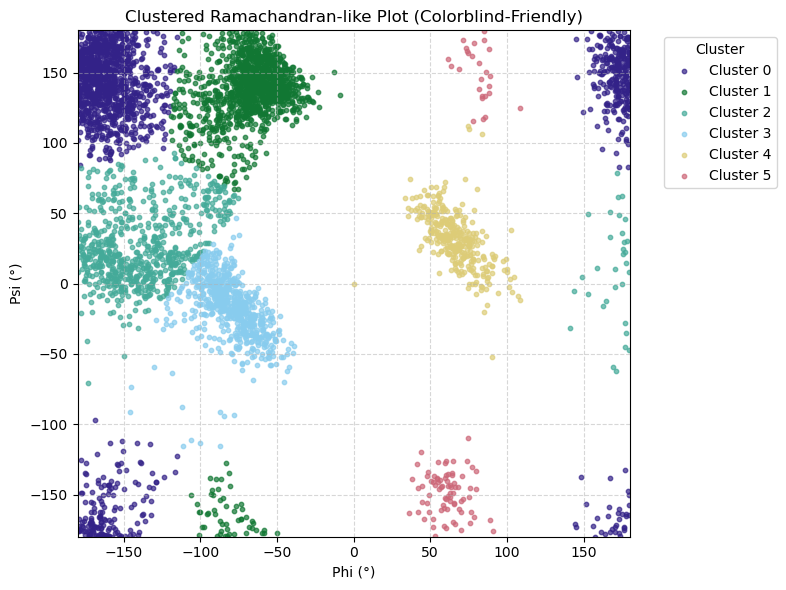

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load your data
labels_file = 'outputs/labels_6.csv'
labels_data = np.loadtxt(labels_file, delimiter=',', skiprows=2)

# Load the data from output3.txt
output3 = np.load('dihedral_angles.npy', allow_pickle=True)

# Combine the original labels data with the output3 column
combined_data = np.column_stack((labels_data, output3))

# Save the new combined data to a CSV file
combined_file_path = 'outputs/trig_combined_data.txt'
np.savetxt(combined_file_path, combined_data, delimiter=',', header='index,cluster_label,phi,psi', comments='')

# 🔹 Load the combined dataset
df = pd.read_csv(combined_file_path, delimiter=',', header=0, names=["index", "cluster_label", "phi", "psi"])

# 🔹 Extract values
phi = df["phi"]
psi = df["psi"]
clusters = df["cluster_label"]

# 🔹 Define a colorblind-friendly palette (Paul Tol's high-contrast colors)
tol_colors = [
    "#332288", "#117733", "#44AA99", "#88CCEE",
    "#DDCC77", "#CC6677", "#AA4499", "#882255", "#661100"
]  # Expand if more clusters are needed

# Ensure enough colors for the number of unique clusters
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

# Assign colors to clusters (cycling through if needed)
cluster_colors = {cluster: tol_colors[i % len(tol_colors)] for i, cluster in enumerate(unique_clusters)}

# 🔹 Create the scatter plot
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    mask = clusters == cluster
    plt.scatter(phi[mask], psi[mask], s=10, color=cluster_colors[cluster], label=f"Cluster {int(cluster)}", alpha=0.7)

# 🔹 Format the plot
plt.xlabel("Phi (°)")
plt.ylabel("Psi (°)")
plt.title("Clustered Ramachandran Plot ")
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

# 🔹 Show the plot
plt.tight_layout()
plt.show()

Much better. Now we can determine state populations by using each cluster as state and summing all the weight within the cluster.

In [28]:
import pandas as pd
import numpy as np
weights = pd.read_csv('weight.dat', header=None, names=['weights'])
labels = pd.read_csv('outputs/labels_6.csv', delimiter=',', header=1, names=['Frame', 'Cluster'])
df = pd.concat([labels, weights], axis=1)
df.drop('Frame', axis = 1, inplace=True)
cluster_weight_sum = df.groupby('Cluster')['weights'].sum()
print(cluster_weight_sum*100)



Cluster
0    32.724182
1    27.744929
2    15.783022
3    15.087645
4     6.565043
5     2.095178
Name: weights, dtype: float64


Now we can pull out representative structures by using the best_frame_indices values. Open this file and copy the frames into the function below. Be sure to include the number of segments per iteration as well as the total number of iterations.

In [6]:
import sys
import math
def find_frame(n_segs, iters, frame):
    frame = int(frame)
    n_segs = int(n_segs)
    iters = int(iters)
    total_frames = n_segs * iters
    percent = frame/total_frames
    decimal, integer = math.modf(percent*iters)
    iteration = int(integer + 1)
    segment = round(decimal*n_segs)
    print(f'Ideal structure in iteration {iteration}, segment {segment}')

In [7]:
find_frame(100, 45, 495)

Ideal structure in iteration 5, segment 95


The structures can be viewed with the code below. Note that we are only concerned with the final frames of each trajectory.

In [2]:
import numpy
import mdtraj as md
import nglview

# Loading in the trajectory
# Use the second line to read from sample_files instead.
traj_files = [
    'traj_segs/000005/000095/seg.nc', 'traj_segs/000037/000099/seg.nc',
    'traj_segs/000021/000039/seg.nc', 'traj_segs/000033/000078/seg.nc',
    'traj_segs/000022/000002/seg.nc', 'traj_segs/000007/000077/seg.nc'
]

# Load trajectories
a = md.load(traj_files, top='common_files/diala.prmtop')
# Passing the MDTraj trajectory to nglview
view = nglview.show_mdtraj(a)

# Display both protein and the water
view.representations = [
    {"type": "ball+stick", "params": {
        "sele": "protein",
    }}
]

# Finally, show us the visualization
view

NGLWidget(max_frame=59)